# EM304 WC ANALYSIS WITH DIFFERENT X and C factor for TVG


## imports some library

In [1]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = [20, 20]


## define display function

In [2]:
def displayWC(file_path,swathNumber,filename,comment):
    with nc.Dataset(file_path) as dataset:
        reflectivity_count= dataset['/sounder/water_column/rx_info/sample_count']
        reflectivity_offset= dataset['/sounder/water_column/rx_info/sample_offset']
        sample_amplitude = dataset['/sounder/water_column/rx_info/sample_amplitude']
        tvg_offset = dataset['/sounder/water_column/rx_info/tvg_offset']
        numOfPings = int(dataset["/sounder"].dimensions["swath_dim"].size)
        numOfBeams = dataset["/sounder/water_column/rx_info/num_beams"]

        #initialize ping (with nans)\n",
        max_samples = max(reflectivity_count[swathNumber])
        #fill ping with data\n",
        beamCount=int(numOfBeams[swathNumber][0])
        ping = np.zeros((beamCount, max_samples))
        ping.fill(float(np.nan))
        for bnr in range(beamCount):
            off=tvg_offset[swathNumber][0] #retrieve TVG offset set by kongberg
            ping[bnr][:reflectivity_count[swathNumber][bnr]] = sample_amplitude[reflectivity_offset[swathNumber][bnr]:reflectivity_offset[swathNumber][bnr] + reflectivity_count[swathNumber][bnr]]/2 -off #O.5 db encoding

        x= ping.reshape(beamCount*max_samples)
        x = x[~np.isnan(x)] #remove nan

        fig, axarr = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})
        #plot the ping
        plt.rcParams['figure.dpi'] = 170
        im=axarr[0].imshow(ping.transpose(),aspect=0.2,cmap=plt.get_cmap("jet"));
        fig.colorbar(im,ax=axarr[0])
       
        axarr[1].hist(x, 256,density=False,orientation='horizontal')
        #axarr[1].set_title('values Histogram')
        axarr[1].set_xlabel("value")
        axarr[1].set_ylabel("density")
        axarr[1].set_autoscalex_on(False)
        axarr[1].set_xlim([0,30000])
        #fig.tight_layout()
        #fig.suptitle(filename + " " + comment)
        plt.grid(True)

        #plt.show()
        print(filename + " " + comment)
        print("Statistiques : min ",x.min(),", max ",x.max(),", mean",x.mean()," std ",x.std())


In [3]:
base_path="F://ESSTECH17//KMALL//Transit_vers_Black_Mud//"

## set the files paths and swath id

0134_20180908_001514.xsf EXTRA DEEP FM X=30 C=40
Statistiques : min  -104.0 , max  23.5 , mean -48.92346731728561  std  17.942243965666016


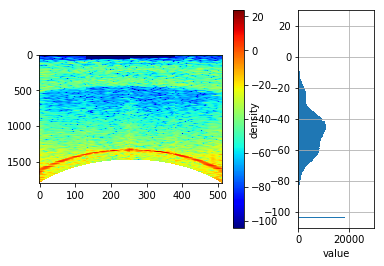

In [4]:
filename="0134_20180908_001514.xsf"
comment="EXTRA DEEP FM X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0134_20180908_001514.xsf EXTRA DEEP FM X=30 C=40
Statistiques : min  -104.0 , max  23.5 , mean -48.92346731728561  std  17.942243965666016


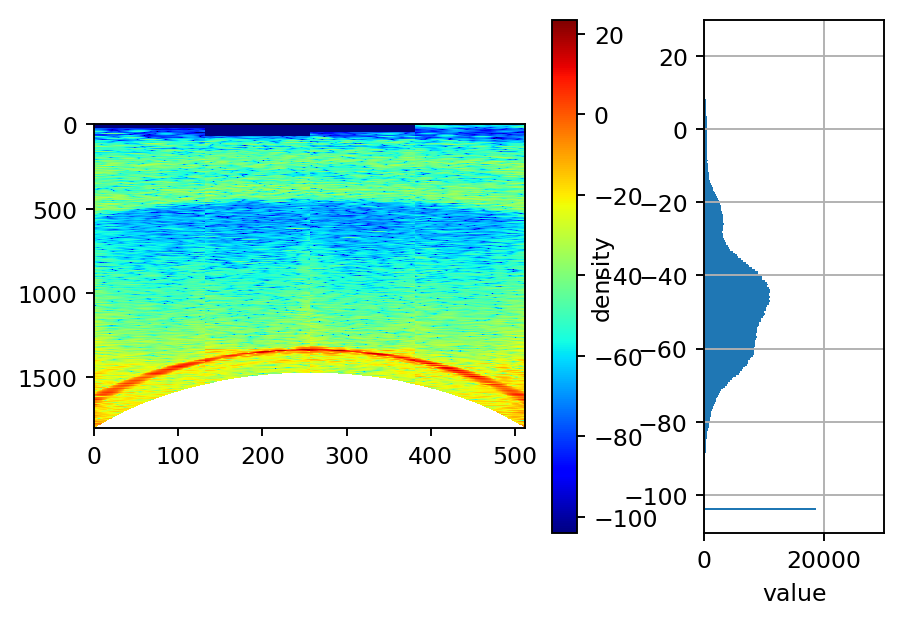

In [5]:
filename="0134_20180908_001514.xsf"
comment="EXTRA DEEP FM X=30 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0137_20180908_002107.xsf EXTRA DEEP FM X=30 C=30
Statistiques : min  -94.0 , max  33.5 , mean -48.60798046327407  std  17.396435551272077


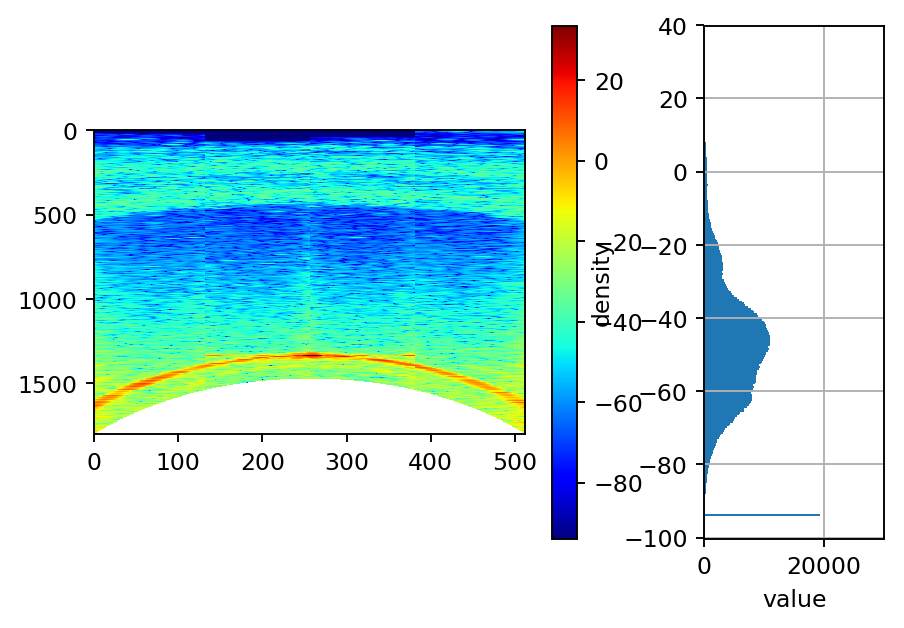

In [6]:
filename="0137_20180908_002107.xsf"
comment="EXTRA DEEP FM X=30 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0138_20180908_002549.xsf EXTRA DEEP FM X=30 C=20
Statistiques : min  -84.0 , max  37.5 , mean -48.28349532807334  std  16.67256876835886


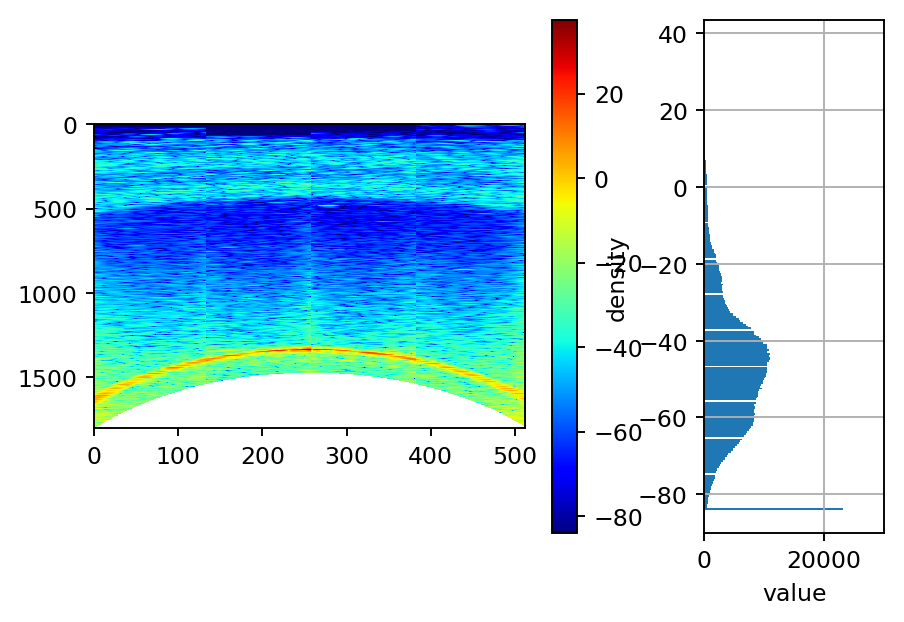

In [7]:
filename="0138_20180908_002549.xsf"
comment="EXTRA DEEP FM X=30 C=20"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0139_20180908_003041.xsf EXTRA DEEP FM X=30 C=0
Statistiques : min  -64.0 , max  40.5 , mean -46.94002718398616  std  14.67364363646607


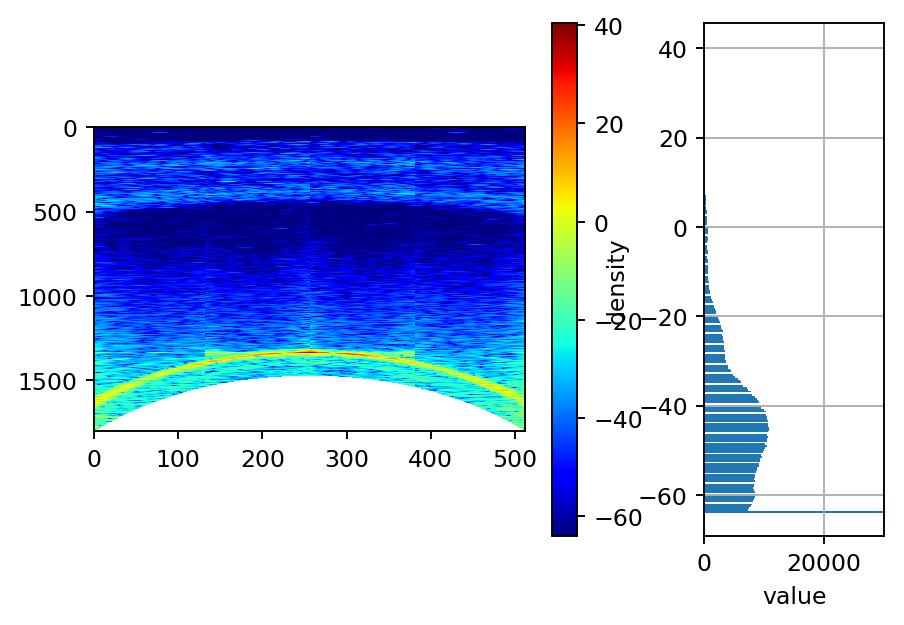

In [8]:
filename="0139_20180908_003041.xsf"
comment="EXTRA DEEP FM X=30 C=0"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0141_20180908_004033.xsf EXTRA DEEP FM X=20 C=40
Statistiques : min  -104.0 , max  8.5 , mean -81.05068634281564  std  14.704070590225614


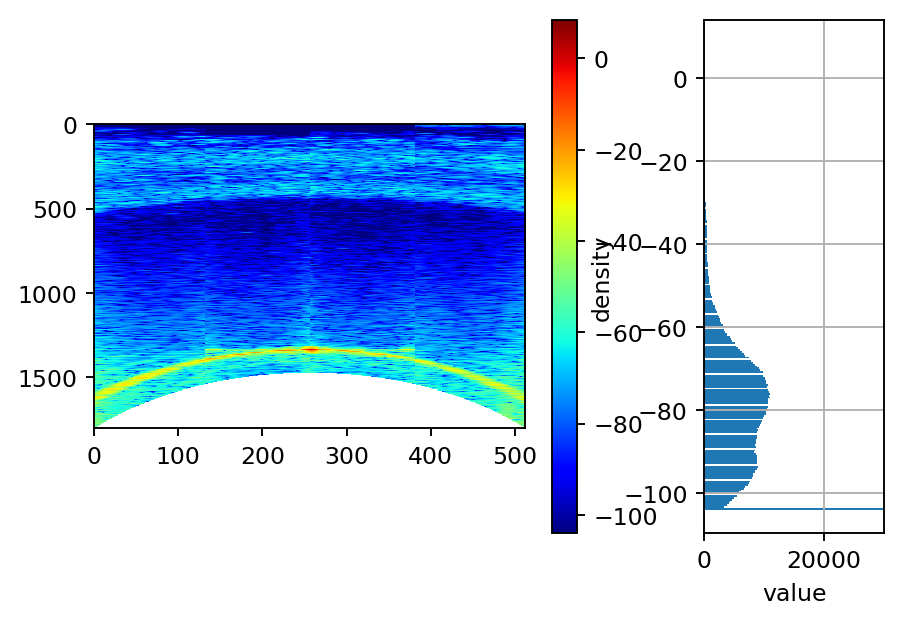

In [9]:
filename="0141_20180908_004033.xsf"
comment="EXTRA DEEP FM X=20 C=40"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0142_20180908_004626.xsf EXTRA DEEP FM X=20 C=30
Statistiques : min  -94.0 , max  14.0 , mean -79.74793986197507  std  12.886814299679042


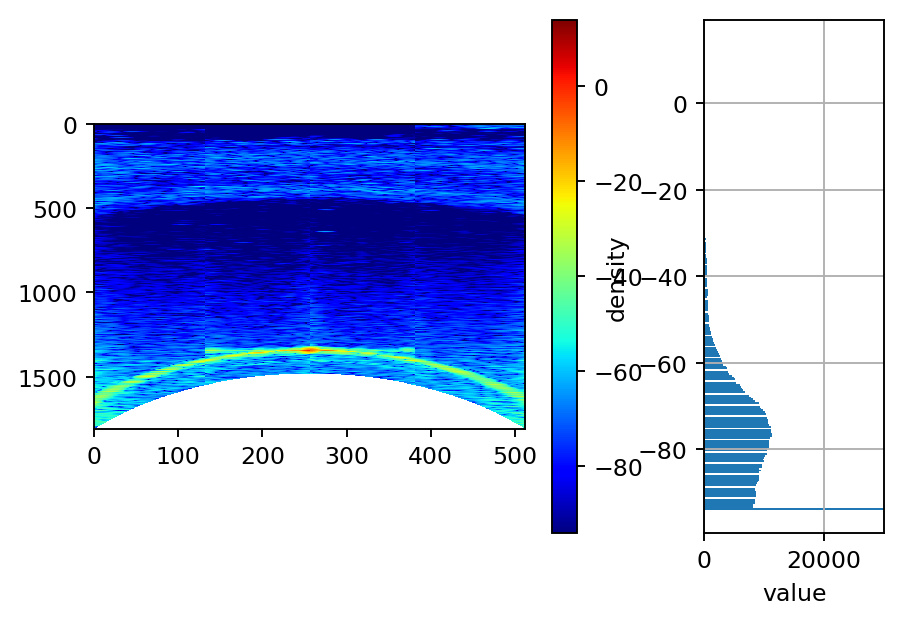

In [10]:
filename="0142_20180908_004626.xsf"
comment="EXTRA DEEP FM X=20 C=30"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)

0143_20180908_005205.xsf EXTRA DEEP FM X=20 C=20
Statistiques : min  -84.0 , max  8.5 , mean -76.82800331471789  std  9.913747710029673


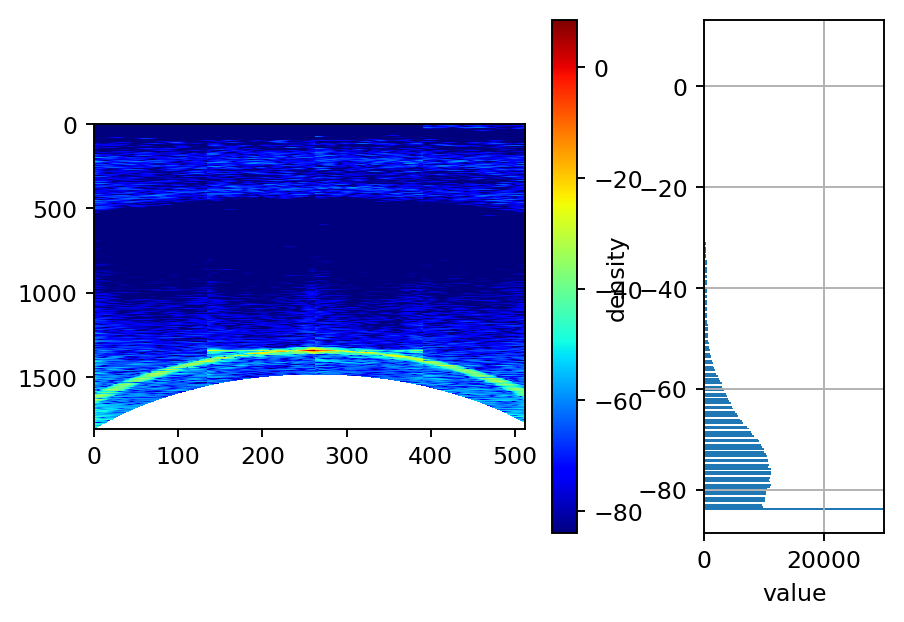

In [11]:
filename="0143_20180908_005205.xsf"
comment="EXTRA DEEP FM X=20 C=20"
file_path= base_path + filename
swathNumber=10
displayWC(file_path,swathNumber,filename,comment)


0144_20180908_005746.xsf EXTRA DEEP FM X=20 C=0
Statistiques : min  -64.0 , max  7.5 , mean -63.002099175390086  std  4.248195609275019


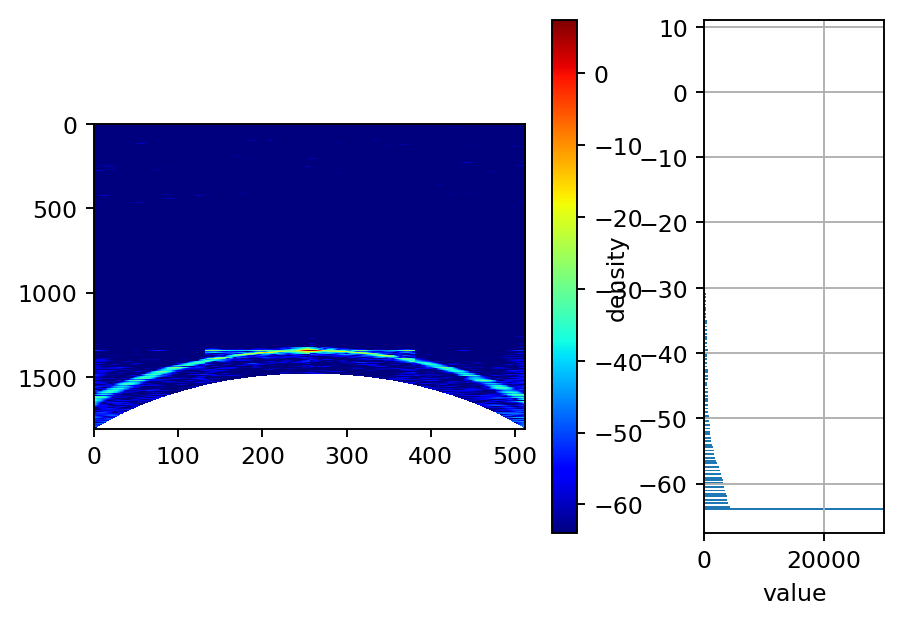

In [12]:
filename="0144_20180908_005746.xsf"
comment="EXTRA DEEP FM X=20 C=0"
file_path= base_path + filename
swathNumber=16
displayWC(file_path,swathNumber,filename,comment)